## Grafi

Per i grafi sono usuali due rappresentazioni: per *archi* (dappresentati da `tuple` di `tuple`) e tramite la relazione di *adiacenza* (rappresentata da un `dict` di `set`).

In [ ]:
arcs = (
  (1, 2), 
  (1, 4),
  (2, 3), 
  (3, 2), 
  (3, 4), 
  (3, 5)
)

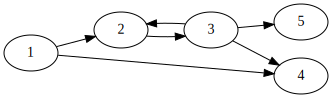

In [ ]:
from liblet import Graph

g = Graph(arcs)
g

In [ ]:
# dagli archi alla mappa delle adiacenze


# per ogni nodo n (sia s o t), adjacency[n] = set()

adjacency = dict()
for s, t in arcs:
  adjacency[s] = set()
  adjacency[t] = set()

# aggiungo gli outlink

for s, t in arcs: adjacency[s] |= {t}

adjacency

{1: {2, 4}, 2: {3}, 4: set(), 3: {2, 4, 5}, 5: set()}

In [ ]:
# e viceversa 

for s, ts in adjacency.items():
  for t in ts: print(s, t)

1 2
1 4
2 3
3 2
3 4
3 5


### Visite

* profondità,
* ampiezza.

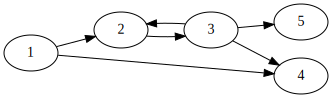

In [ ]:
def depthfirst(adjacency, start, visit):
  def walk(src):
    visit(src)
    seen.add(src)
    for dst in adjacency[src]:
      if dst not in seen: 
        walk(dst)
  seen = set()
  walk(start)

g

In [ ]:
depthfirst(adjacency, 1, print)

1
2
3
4
5


In [ ]:
from liblet import Queue

def breadthfirst(adjacency, start, visit):

  Q = Queue()

  seen = set()
  Q.enqueue(start)
  while Q:
    src = Q.dequeue()
    visit(src)
    seen.add(src)
    for dst in adjacency[src]:
      if dst not in seen:
        Q.enqueue(dst)

In [ ]:
breadthfirst(adjacency, 1, print)

1
2
4
3
5


## Backtracking

Il [backtracking](https://en.wikipedia.org/wiki/Backtracking) è uno schema di algoritmi ricorsivi per problemi la cui soluzione possa essere costruita incrementalmente a partire da una soluzione "candidata". Lo schema generale è

```python
def backtrack(candidate):
    if reject(candidate): return
    if accept(candidate): output(candidate)
    s = first(candidate)
    while s:
        backtrack(s)
        s = next(candidate)
```

Le funzioni `reject` e `accept` hanno l'ovvio significato di indicare, rispettivamente, se una soluzione candidata è non corretta (e non ulteriormente emendabile), oppure se costituisce una soluzione (completa). Le funzioni `first` e `next` costruiscono rispettivamente il primo e i successivi candidati a partire dal candidato corrente.

### Segmentazione di una parola

In [ ]:
from urllib.request import urlopen

# WORDS sono le parole di almeno 2 caratteri (3 conta anche l'a-capo)

with urlopen('https://raw.githubusercontent.com/napolux/paroleitaliane/master/paroleitaliane/60000_parole_italiane.txt') as url: 
  WORDS = {word.decode().strip().upper() for word in url if len(word) >= 3}

print(len(WORDS))

60418


In [ ]:
def segmenta(segmenti, resto):
  if segmenti and not segmenti[-1] in WORDS: return
  if not resto: 
    print(segmenti)
    return
  for i in range(1, 1 + len(resto)):
    segmenta(segmenti + [resto[:i]], resto[i:])

In [ ]:
segmenta([], 'ILCORRIEREDELLASERAEDIZIONENOTTURNA')

['IL', 'CORRI', 'ERE', 'DEL', 'LA', 'SERA', 'EDIZIONE', 'NOTTURNA']
['IL', 'CORRI', 'ERE', 'DELLA', 'SERA', 'EDIZIONE', 'NOTTURNA']
['IL', 'CORRIERE', 'DEL', 'LA', 'SERA', 'EDIZIONE', 'NOTTURNA']
['IL', 'CORRIERE', 'DELLA', 'SERA', 'EDIZIONE', 'NOTTURNA']


# Grammatiche, supporto in LibLeT

In [ ]:
from liblet import Grammar, Derivation, ProductionGraph

## Senza restrizioni sulle produzioni (tipo 0)

In [ ]:
# fig 2.3, pag. 14

grammar = """
Sentence -> Name | List End
List -> Name | Name , List
Name -> tom | dick | harry
, Name End -> and Name
"""

Tramite [liblet](https://liblet.readthedocs.io/) si può costruire una [grammatica](https://liblet.readthedocs.io/en/latest/api.html#liblet.grammar.Grammar) a partire da una descrizione testuale tramite [Grammar.from_string](https://liblet.readthedocs.io/en/latest/api.html#liblet.grammar.Grammar.from_string)

In [ ]:
G = Grammar.from_string(grammar, False)
G

Grammar(N={End, List, Name, Sentence}, T={,, and, dick, harry, tom}, P=(Sentence -> Name, Sentence -> List End, List -> Name, List -> Name , List, Name -> tom, Name -> dick, Name -> harry, , Name End -> and Name), S=Sentence)

In [ ]:
# Elenco (numerato) delle produzioni

G.P

(Sentence -> Name,
 Sentence -> List End,
 List -> Name,
 List -> Name , List,
 Name -> tom,
 Name -> dick,
 Name -> harry,
 , Name End -> and Name)

Fissata la grammatica, si può costruire una [derivazione](https://liblet.readthedocs.io/en/latest/api.html#liblet.grammar.Derivation) specificandone in passi, con [Derivation.step](https://liblet.readthedocs.io/en/latest/api.html#liblet.grammar.Derivation.step)

In [ ]:
# costruzione di una derivazione

d = Derivation(G)

In [ ]:
# i prossimi passi possibili

list(d.possible_steps())

[(0, 0), (1, 0)]

In [ ]:
# ne applico uno

d = d.step(1, 0)
d

Sentence -> List End

In [ ]:
# se volgio solo la forma sentenziale

d.sentential_form()

('List', 'End')

In [ ]:
# procedo con altri passi… 

d = d.step(3, 0)
d

Sentence -> List End -> Name , List End

In [ ]:
d = d.step(3, 2)
d

Sentence -> List End -> Name , List End -> Name , Name , List End

In [ ]:
d = (
  d.step(2, 4)
   .step(7, 3)
   .step(4, 0)
   .step(5, 2)
   .step(6, 4)
)

In [ ]:
d

Sentence -> List End -> Name , List End -> Name , Name , List End -> Name , Name , Name End -> Name , Name and Name -> tom , Name and Name -> tom , dick and Name -> tom , dick and harry

In [ ]:
set(d.sentential_form()) <= G.T

True

Sebbene la rappresentazione testuale della derivazione sia piuttosto chiara, può aiutare averne una rappresentazione garfica, tramite un [ProductionGraph](https://liblet.readthedocs.io/en/latest/api.html#liblet.display.ProductionGraph)

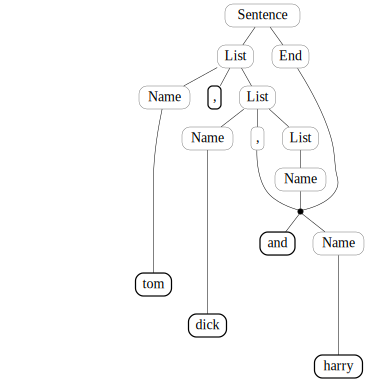

In [ ]:
ProductionGraph(d)